# Несбалансированные данные (Imbalanced Data)

---

[Imbalanced Data](https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data)

[Dealing with Imbalanced Data](https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18)

[A Gentle Introduction to Imbalanced Classification](https://machinelearningmastery.com/what-is-imbalanced-classification/)

[8 Tactics to Combat Imbalanced Classes in Your Machine Learning Dataset](https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/)

[Dealing with Imbalanced Data](https://medium.com/digital-catapult/dealing-with-imbalanced-data-8b21e6deb6cd)

[]()

[]()


---

In [ ]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
# !where pip

In [ ]:
# !conda install pandas matplotlib numpy seaborn -y

In [3]:
import numpy as np

np.__version__

'1.19.2'

In [4]:
import pandas as pd

pd.__version__

'1.2.3'

In [5]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.3.4'

In [6]:
import seaborn as sns

sns.__version__

'0.11.1'

## Загрузка данных

[Источник (Adult income dataset)](https://www.kaggle.com/wenruliu/adult-income-dataset).

[Описание](http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html)

[Дополнительное описание + анализ](http://cseweb.ucsd.edu/classes/sp15/cse190-c/reports/sp15/048.pdf)

In [7]:
df = pd.read_csv('./../../data/adult.csv')

# показать все колонки
pd.options.display.max_columns = None

# изменить формат отображения с помощью средства форматирования
# (float без E, а 2 знаков после запятой)
# (для удобства чтения)
pd.options.display.float_format = '{:.2f}'.format

# отобразить первые 5 и последние 5 строк
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [8]:
# получить сведения о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


## Графическое представление несбалансированных данных (Imbalanced Data)

In [9]:
df_cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()
cat_cols_len = len(df_cat_cols)

df_cat_cols

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country',
 'income']

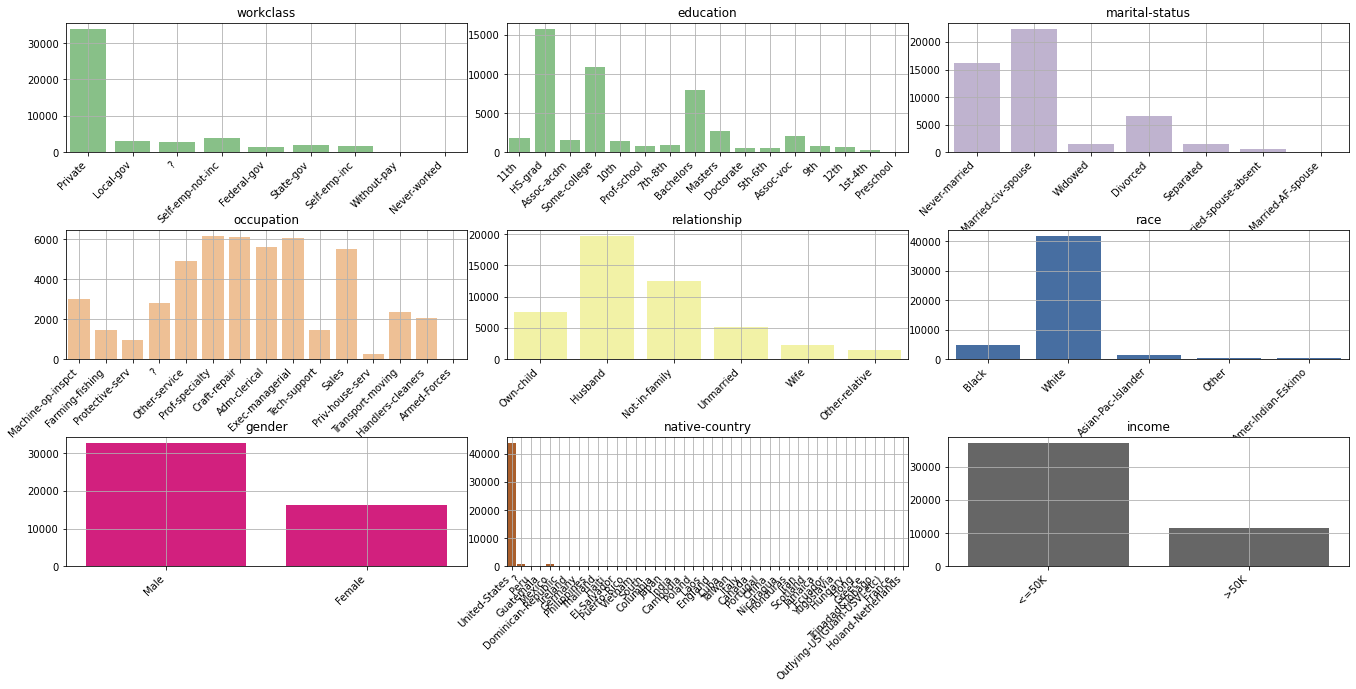

In [37]:
num_in_line = 3
fig, axs = plt.subplots(cat_cols_len//num_in_line + cat_cols_len%num_in_line, num_in_line, figsize=(23, 10))

cmap = plt.get_cmap('Accent')

for index, column_name in enumerate(df_cat_cols):
    c = cmap(index/cat_cols_len)
    
    ax = axs[index//num_in_line][index%num_in_line]
    
    g = sns.countplot(data=df, x=column_name, ax=ax, color=c)
    g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)
    ax.set_title(column_name)
    ax.grid()


fig.subplots_adjust(hspace=0.6, wspace=0.1)

## Что такое несбалансированные данные (Imbalanced Data)

